In [223]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [224]:
# Load the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv("data_xG.csv")

print(df)

     Position               Team  Points xG+/-xG differential
0           1            Chelsea      87           68.64-4.36
1           2    Manchester City      79           75.82-7.18
2           3            Arsenal      75           69.80-1.20
3           4  Manchester United      70           54.21-7.79
4           5          Tottenham      64           52.39-5.61
..        ...                ...     ...                  ...
195        16          Brentford      39           62.59+8.59
196        17  Nottingham Forest      33           50.58+3.58
197        18              Luton      26           47.81-2.19
198        19            Burnley      24           42.36+2.36
199        20   Sheffield United      16           40.61+5.61

[200 rows x 4 columns]


## Data Pre-Processing

In [225]:
# Separate the last column based on some regex
split_data = df['xG+/-xG differential'].str.extract(r'(?P<xG>[\d\.]+)(?P<sign>[\+\-])(?P<diff>[\d\.]+)')
df[['xG', 'sign', 'xG differential']] = split_data

# Converting the columns to appropriate numeric types
df['xG'] = pd.to_numeric(df['xG'])
df['xG differential'] = pd.to_numeric(df['xG differential'])

# Adjusting sign based on plus or minus
df['xG differential'] *= df['sign'].apply(lambda x: 1 if x == '+' else -1)

# Add new column 'Tier'
df['Tier'] = 0
df.loc[df['Position'] <= 10, 'Tier'] = 1

# Printing the DataFrame to check the result
print(df)

     Position               Team  Points xG+/-xG differential     xG sign  \
0           1            Chelsea      87           68.64-4.36  68.64    -   
1           2    Manchester City      79           75.82-7.18  75.82    -   
2           3            Arsenal      75           69.80-1.20  69.80    -   
3           4  Manchester United      70           54.21-7.79  54.21    -   
4           5          Tottenham      64           52.39-5.61  52.39    -   
..        ...                ...     ...                  ...    ...  ...   
195        16          Brentford      39           62.59+8.59  62.59    +   
196        17  Nottingham Forest      33           50.58+3.58  50.58    +   
197        18              Luton      26           47.81-2.19  47.81    -   
198        19            Burnley      24           42.36+2.36  42.36    +   
199        20   Sheffield United      16           40.61+5.61  40.61    +   

     xG differential  Tier  
0              -4.36     1  
1              -7

## KNN Model

In [226]:
def KNN_Model(X_train, X_test, y_train, y_test):

    # Define the number of neighbors for KNN
    N_Value = 5

    # Create a KNN classifier with the specified number of neighbors
    knn = KNeighborsClassifier(n_neighbors=N_Value)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    # Predict the labels for the test set
    y_pred = knn.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model accuracy: {accuracy:.2f}") 

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    labels = ['Bottom Half', 'Top Half']
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix KNN (K=5)')
    plt.show()

## NAIVE BAYES

In [227]:
def NaiveBayes(X_train, X_test, y_train, y_test):
    
    naive_bayes_model = GaussianNB()
    naive_bayes_model.fit(X_train, y_train)
    y_pred = naive_bayes_model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f_score = metrics.f1_score(y_test, y_pred)
    print("Accuracy: {:.5f}".format(accuracy))
    print("Precision: {:.5f}".format(precision))
    print("Recall: {:.5f}".format(recall))
    print("F-score: {:.5f}".format(f_score))
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    labels = ['Bottom Half', 'Top Half']
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix Naive Bayes')
    plt.show()


In [228]:
def Neural_Network(X_train, X_test, y_train, y_test):
    model = Sequential()

    # Adding layers to the model
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # Assuming binary classification, change activation function accordingly

    # Compiling the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Training the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


    y_pred = model.predict_classes(X_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f_score = metrics.f1_score(y_test, y_pred)
    print("Accuracy: {:.5f}".format(accuracy))
    print("Precision: {:.5f}".format(precision))
    print("Recall: {:.5f}".format(recall))
    print("F-score: {:.5f}".format(f_score))

    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    labels = ['Bottom Half', 'Top Half']
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix Naive Bayes')
    plt.show()

In [229]:
def Models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    KNN_Model(X_train, X_test, y_train, y_test)
    NaiveBayes(X_train, X_test, y_train, y_test)
    # Neural_Network(X_train, X_test, y_train, y_test)

## xG Model

Model accuracy: 0.70


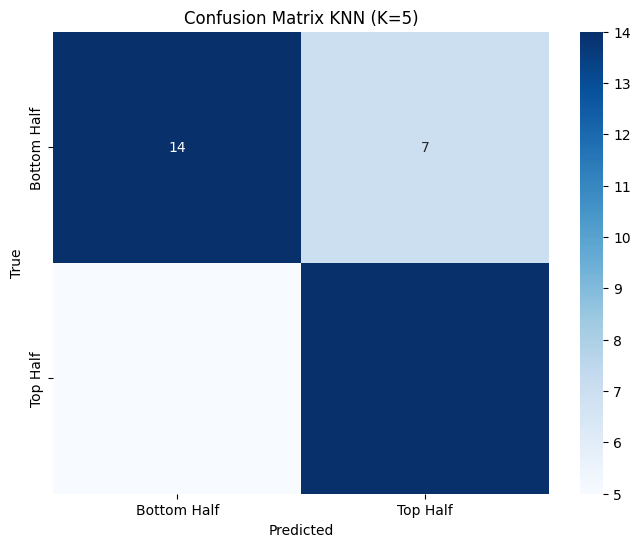

Accuracy: 0.77500
Precision: 0.81250
Recall: 0.68421
F-score: 0.74286


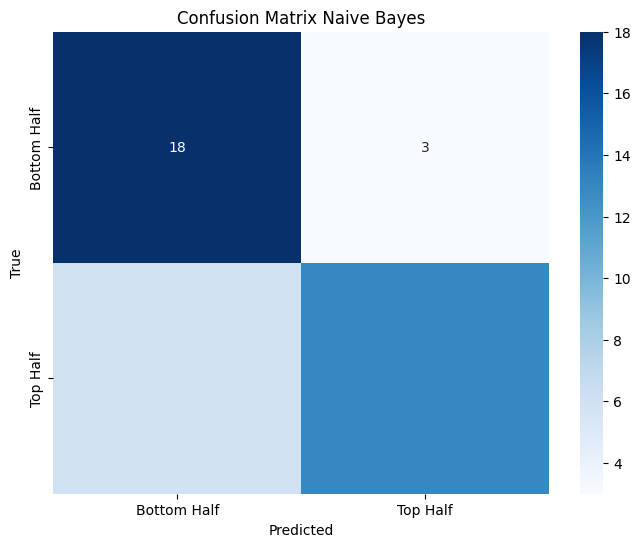

In [230]:
# Separate features (X) and labels (y) from the dataframe
X = df[['xG']]
y = df['Tier']  

Models(X, y)

## xG Differential Model

Model accuracy: 0.55


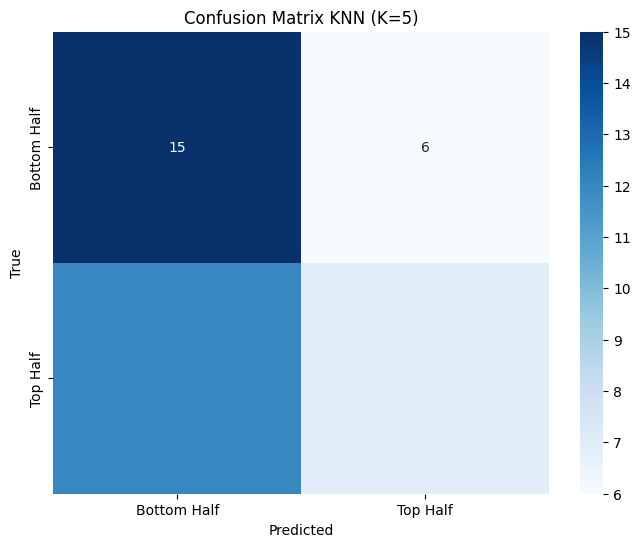

Accuracy: 0.65000
Precision: 0.66667
Recall: 0.52632
F-score: 0.58824


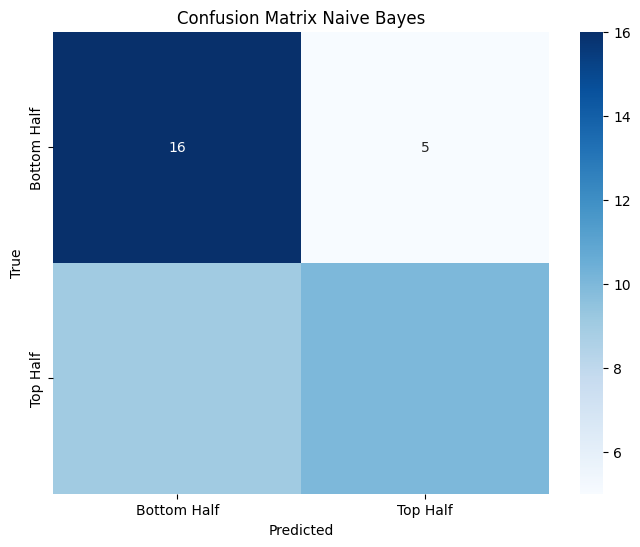

In [231]:
# Separate features (X) and labels (y) from the dataframe
X = df[['xG differential']] 
y = df['Tier']  

Models(X, y)